In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/StudentPerformanceFactors.csv")

In [3]:
ds.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
ds.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [9]:
mode_value1=ds["Teacher_Quality"].mode()
print(mode_value1)

0    Medium
Name: Teacher_Quality, dtype: object


In [7]:
mode_value2=ds["Parental_Education_Level"].mode()
print(mode_value2)

0    High School
Name: Parental_Education_Level, dtype: object


In [8]:
mode_value3=ds["Distance_from_Home"].mode()
print(mode_value3)

0    Near
Name: Distance_from_Home, dtype: object


In [38]:

ds['Teacher_Quality'].fillna(ds['Teacher_Quality'].mode()[0], inplace=True)
ds['Parental_Education_Level'].fillna(ds['Parental_Education_Level'].mode()[0], inplace=True)
ds['Distance_from_Home'].fillna(ds['Distance_from_Home'].mode()[0], inplace=True)


ds.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [39]:
#question

In [43]:
#How does the number of hours studied per week correlate with the final exam score?
correlation = ds['Hours_Studied'].corr(ds['Exam_Score'])
print(f"The correlation between Hours Studied Per Week and Final Exam Score is: {correlation}")


The correlation between Hours Studied Per Week and Final Exam Score is: 0.44545495407528235


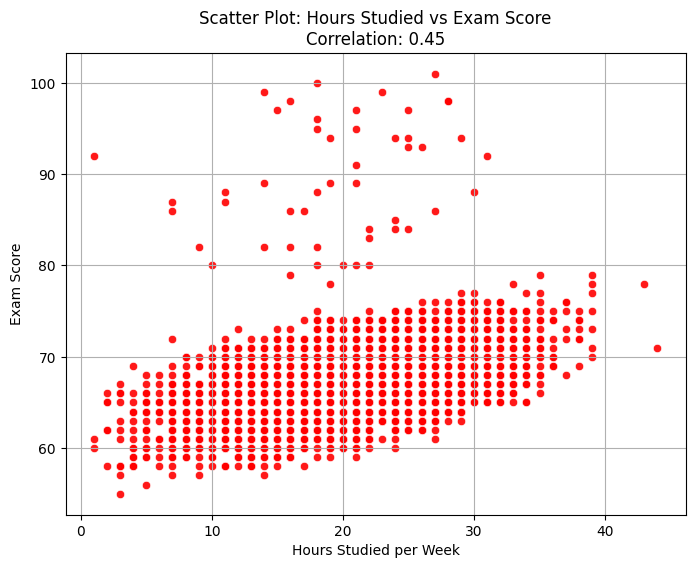

In [55]:
#for visual representation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=ds, color='red', alpha=0.9)
plt.title(f'Scatter Plot: Hours Studied vs Exam Score\nCorrelation: {correlation:.2f}')
plt.xlabel('Hours Studied per Week')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [49]:
#Do private school students perform better in exams than public school students?
avg_scores = ds.groupby('School_Type')['Exam_Score'].mean()

print(f"Average Exam Score for Private School Students: {avg_scores.get('Private', 'N/A')}")
print(f"Average Exam Score for Public School Students: {avg_scores.get('Public', 'N/A')}")

if avg_scores.get('Private', 0) > avg_scores.get('Public', 0):
    print("Private school students tend to perform better in exams than public school students.")
elif avg_scores.get('Private', 0) < avg_scores.get('Public', 0):
    print("Public school students tend to perform better in exams than private school students.")
else:
    print("Private and public school students perform equally in exams.")


Average Exam Score for Private School Students: 67.28770532603285
Average Exam Score for Public School Students: 67.21291866028709
Private school students tend to perform better in exams than public school students.


<ipython-input-67-7b3d330c444c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='School_Type', y='Exam_Score', data=ds, palette='viridis')


<Axes: xlabel='School_Type', ylabel='Exam_Score'>

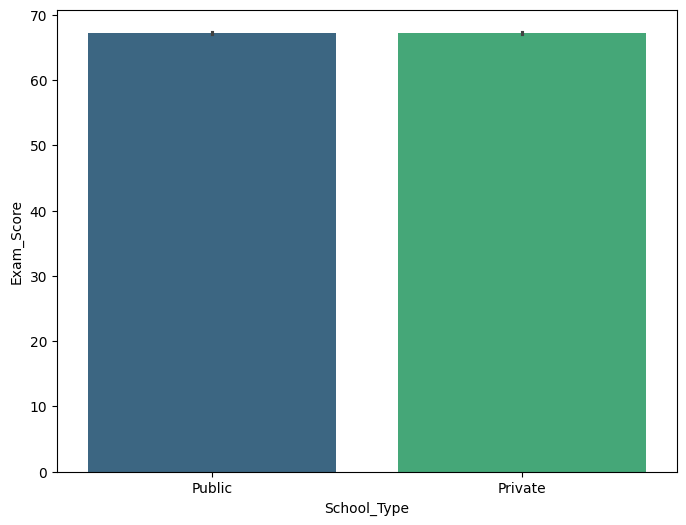

In [67]:
#for visual repersentation
plt.figure(figsize=(8, 6))
sns.barplot(x='School_Type', y='Exam_Score', data=ds, palette='viridis')